<a href="https://colab.research.google.com/github/feniltailor22/Time-Series-Analysis/blob/main/Stock_Price_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [ ]:
df1= df.reset_index()['close']

In [ ]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [ ]:
df1.shape

(1258,)

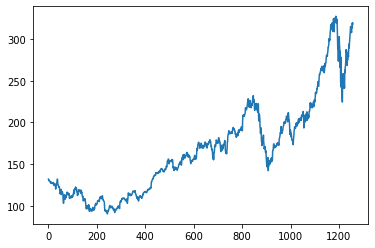

In [ ]:
plt.plot(df1)

In [ ]:
#LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler= MinMaxScaler(feature_range=(0, 1))

In [ ]:
df1= scaler.fit_transform(np.array(df1).reshape(-1,1)) #reshape(-1,1) convert the array into a 1D array.

In [ ]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
df1.shape

(1258, 1)

In [ ]:
#Train Test Split: In TimeSeries Analysis we need to split the data in a sequence (not random split) as each suceeding data depending on its precedding datas.

In [ ]:
training_size= int(len(df1)*0.65) #65% of training data from df1
testing_size= len(df1)- training_size #35% of testing data from df1

In [ ]:
training_size, testing_size

(817, 441)

In [ ]:
train_data, test_data= df1[0:training_size, :1], df1[training_size:len(df1),:1] #df1[0:817, :1], df1[817:1258,:1]
#first 65% data will be training data and rest 35% data will be testing data.

In [ ]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [ ]:
test_data

array([[0.52651355],
       [0.52837119],
       [0.53119986],
       [0.53871485],
       [0.5461454 ],
       [0.55999324],
       [0.56864815],
       [0.57962509],
       [0.58270708],
       [0.57641645],
       [0.56049987],
       [0.55290045],
       [0.54036139],
       [0.5636663 ],
       [0.55192941],
       [0.57447437],
       [0.56362408],
       [0.53846154],
       [0.53998142],
       [0.54053027],
       [0.54753863],
       [0.53753272],
       [0.55074728],
       [0.55665794],
       [0.54918517],
       [0.56831039],
       [0.5716457 ],
       [0.57806299],
       [0.58659124],
       [0.59837035],
       [0.58114498],
       [0.56552394],
       [0.56332855],
       [0.57641645],
       [0.53204425],
       [0.52398041],
       [0.55632019],
       [0.53626615],
       [0.55648907],
       [0.55243604],
       [0.5306088 ],
       [0.54449886],
       [0.55015621],
       [0.55893777],
       [0.52668243],
       [0.54656759],
       [0.53179093],
       [0.514

In [ ]:
len(train_data), len(test_data)

(817, 441)

#TimeSeries data Train-Test Sequence Data feeding

Suppose my training dataset= 120,130,125,140,134,150 and 
           testing dataset= 160,190,154,160,170

Take timesteps= 3

Hence,
      
        X_train       y_train
      f1   f2   f3      o/p
      120  130  125 --> 140  
      130  125  140 --> 134
      125  140  134 --> 150 
    
and,
 
        X_test       y_test
      f1   f2   f3      o/p
      160  190  154 --> 160  
      190  154  160 --> 170 

####If we take timesteps= 100 then the model will take 0-99 index values as input data and 100th index value will be output.

In [ ]:
#convert an array of values into a dataset matrix.
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, 0,1,2,3-----99   100 if timesteps=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
train_data[0:3,0] 
#cheking for dataset[i:(i + timesteps), 0] where i=0 and timesteps=3; i++

array([0.17607447, 0.17495567, 0.16862282])

In [ ]:
train_data[3,0] 
#cheking for dataset[i + timesteps, 0] where i=0 and timesteps=3; i++
#this is my X_train[3] i.e. output for first timestepped data of X_train[0:3,0]

0.1696994004897408

In [ ]:
train_data[1:4,0] 
#cheking for dataset[i:(i + timesteps), 0] where i=1 and timesteps=3; i++

array([0.17495567, 0.16862282, 0.1696994 ])

In [ ]:
train_data[4,0] 
#cheking for dataset[i + timesteps, 0] where i=1 and timesteps=3; i++
#this is my X_train[4] i.e. output for first timestepped data of X_train[1:4,0]

0.1672718061302036

In [ ]:
#Feeding training and testing data into a sequential split
X_train, y_train= create_dataset(train_data, time_step=100)
X_test, y_test= create_dataset(test_data, time_step=100)

In [ ]:
X_train

array([[0.17607447, 0.17495567, 0.16862282, ..., 0.09055982, 0.08388922,
        0.09085536],
       [0.17495567, 0.16862282, 0.1696994 , ..., 0.08388922, 0.09085536,
        0.0873934 ],
       [0.16862282, 0.1696994 , 0.16727181, ..., 0.09085536, 0.0873934 ,
        0.09030651],
       ...,
       [0.34801148, 0.32930845, 0.32145571, ..., 0.50042219, 0.50413747,
        0.5062062 ],
       [0.32930845, 0.32145571, 0.32694419, ..., 0.50413747, 0.5062062 ,
        0.51920966],
       [0.32145571, 0.32694419, 0.32230009, ..., 0.5062062 , 0.51920966,
        0.53719497]])

In [ ]:
X_test

array([[0.52651355, 0.52837119, 0.53119986, ..., 0.26154691, 0.25187875,
        0.26483999],
       [0.52837119, 0.53119986, 0.53871485, ..., 0.25187875, 0.26483999,
        0.27273495],
       [0.53119986, 0.53871485, 0.5461454 , ..., 0.26483999, 0.27273495,
        0.2766191 ],
       ...,
       [0.81875369, 0.84256523, 0.84210082, ..., 0.92544119, 0.91771511,
        0.9483239 ],
       [0.84256523, 0.84210082, 0.84936249, ..., 0.91771511, 0.9483239 ,
        0.94064004],
       [0.84210082, 0.84936249, 0.85835515, ..., 0.9483239 , 0.94064004,
        0.96635143]])

In [ ]:
print(X_train.shape), print(y_train.shape) 
#100 feature columns for X_train

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(y_test.shape) 
#100 feature columns for X_test

(340, 100)
(340,)


(None, None)

####The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

**Samples:** One sequence is one sample. A batch is comprised of one or more samples.

**Time Steps:** One time step is one point of observation in the sample.

**Features:** One feature is one observation at a time step.

This means that the input layer expects a 3D array of data when fitting the model and when making predictions, even if specific dimensions of the array contain a single value, e.g. one sample or one feature.

In [ ]:
#reshape input to be [samples, time steps, features] which is required for LSTM.
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((716, 100, 1), (340, 100, 1))

In [ ]:
#Create the Stacked LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model= Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(100, 1))) 
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
#return_sequences: Whether to return the last output. in the output sequence, or the full sequence.
#return_sequences is used to access the hidden state output for each input time step.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 11s 212ms/step - loss: 0.0170 - accuracy: 0.0014 - val_loss: 0.0590 - val_accuracy: 0.0029
Epoch 2/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0036 - accuracy: 0.0014 - val_loss: 0.0039 - val_accuracy: 0.0029
Epoch 3/100
12/12 [==============================] - 1s 88ms/step - loss: 0.0010 - accuracy: 0.0014 - val_loss: 0.0080 - val_accuracy: 0.0029
Epoch 4/100
12/12 [==============================] - 1s 88ms/step - loss: 7.3417e-04 - accuracy: 0.0014 - val_loss: 0.0037 - val_accuracy: 0.0029
Epoch 5/100
12/12 [==============================] - 1s 88ms/step - loss: 6.3731e-04 - accuracy: 0.0014 - val_loss: 0.0036 - val_accuracy: 0.0029
Epoch 6/100
12/12 [==============================] - 1s 88ms/step - loss: 5.9096e-04 - accuracy: 0.0014 - val_loss: 0.0036 - val_accuracy: 0.0029
Epoch 7/100
12/12 [==============================] - 1s 86ms/step - loss: 6.0032e-04 - accuracy: 0.0014 - val_loss: 0.0035 - val_accur

In [ ]:
model_loss= pd.DataFrame(data=model.history.history)

In [ ]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.017049,0.001397,0.059049,0.002941
1,0.003625,0.001397,0.003927,0.002941
2,0.001024,0.001397,0.008029,0.002941
3,0.000734,0.001397,0.003729,0.002941
4,0.000637,0.001397,0.003649,0.002941


In [ ]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

In [ ]:
#Train Data RMSE
math.sqrt(mean_squared_error(y_train,train_predict))

140.48475355703397

In [ ]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

232.9946334624023

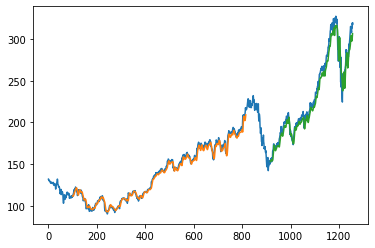

In [ ]:
#Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1)) #in blue color
plt.plot(trainPredictPlot) #predicted training data output in orange color
plt.plot(testPredictPlot) #predicted testing data output in green color
plt.show()

In [ ]:
#predicting future 30 days stock price

In [ ]:
len(test_data)

441

In [ ]:
#we are trying to predict the 442th test data (new test data) stock price on the basis of 341-441 test data (taking timesteps= 100).

In [ ]:
x_input= test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
#converting input into a list
temp_input= list(x_input)

In [ ]:
temp_input

[array([0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [ ]:
#converting array into a list
temp_input= temp_input[0].tolist()

In [ ]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [ ]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print('Future 30 days stock prices are: ', lst_output)

0 day input [0.99016297 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007
 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017
 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113
 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013
 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193
 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292
 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832 0.83049059
 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543 0.78426074
 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843
 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211
 0.948535   0.93333615 0.91746179 0.92544119 0.91771511 0.9483239
 0.94064004 0.96635143 0.9563033  0.96491598 0.92923492 0.91754711
 0.89622027 0.87225574 0.84935719 0.82922149 0.81262857 0.79982805
 0.79062867 0.78447461 0.78057206 0.77803862 0.77603769 0.77388287
 0.77110165 0.76745999 0.76295042 0.75775129 0.7521

In [ ]:
#plotting the new predicted output
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1258

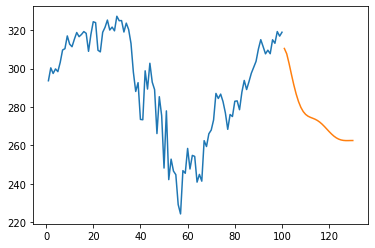

In [ ]:
#plotting the future 30 days output with last 100 days input data
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

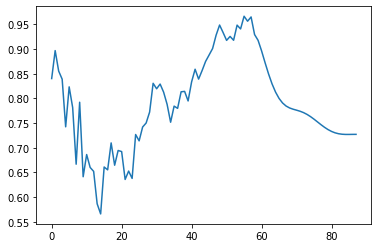

In [ ]:
#combining df1 with the future predicted output
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
#plotting the entire dataset and future 30 days results in a single plot
df3=scaler.inverse_transform(df3).tolist()

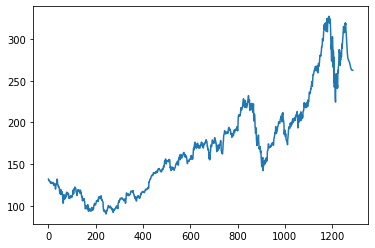

In [ ]:
plt.plot(df3)